## ML kaggle
source : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

Goal : learn the basics of sklearn and find insights in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_house_price = pd.read_csv("train.csv")
data_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data_house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
target_column = "SalePrice"

In [5]:
from pandas.api.types import is_numeric_dtype


In [6]:
numerical = data_house_price.drop(columns=["Id",target_column])
numerical = numerical.select_dtypes(include=['number'])
numerical = numerical.dropna(axis=1)

In [7]:
numerical

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
y = data_house_price[[target_column]]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [11]:
x = data_house_price[['LotArea']]
x

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [12]:
model.fit(X=x,y=y)

LinearRegression()

In [13]:
a = model.coef_[0][0] # a 
a

2.0999719517076745

In [14]:
b = model.intercept_[0]# b
b

158836.1518968766

/home/arawn/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


y = 2.1000*x+158836.1519


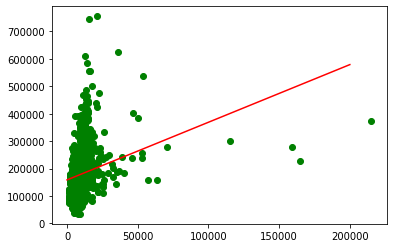

In [15]:
plt.scatter(x,y,color="green",)
x_test = np.arange(0,200000,0.1)
y_test = model.predict(pd.DataFrame(x_test))
plt.plot(x_test, y_test,c="red")
print(f"y = {a:.4f}*x+{b:.4f}")
plt.show()

Remark : The model isn't very precice ... 

In [16]:
from sklearn.metrics import mean_squared_log_error, r2_score , mean_squared_error

In [17]:
y_predict = model.predict(x)

In [18]:
mse_log = mean_squared_log_error(y_true=y,y_pred=y_predict)
mse_log

0.15119451125607988

In [19]:
models = []
for col in numerical.columns:
    model = LinearRegression()
    x = numerical[[col]]
    model.fit(x,y)
    y_predict = model.predict(x)
    y_predict = np.clip(y_predict,0,None)
    mse_log = mean_squared_log_error(y_true=y,y_pred=y_predict)

    models.append((col,mse_log,model))

In [20]:
Tableu_models = pd.DataFrame(models,columns=["col","mse","model"])

In [21]:
best_model = Tableu_models.sort_values("mse").iloc[0]["model"]
best_colum = Tableu_models.sort_values("mse").iloc[0]["col"]
best_colum

'GrLivArea'

y = 2.1000*x+158836.1519


/home/arawn/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


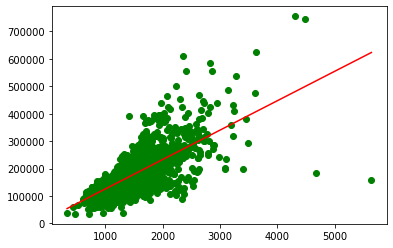

In [22]:
X = numerical[[best_colum]]
plt.scatter(X,y,color="green",)
x_test = np.arange(int(X.min()),int(X.max()),1)
y_test = best_model.predict(pd.DataFrame(x_test))
plt.plot(x_test, y_test,c="red")
print(f"y = {a:.4f}*x+{b:.4f}")
plt.show()

In [23]:
np.arange(int(X.min()),int(X.max()),1)

array([ 334,  335,  336, ..., 5639, 5640, 5641])

In [24]:
X.max()

GrLivArea    5642
dtype: int64

### First submit in kaggle

In [25]:
test = pd.read_csv("test.csv")
pred_best = best_model.predict(test[[best_colum]])
pred_best = pred_best.reshape(-1)
submit = pd.DataFrame({"Id": test["Id"], "SalePrice": pred_best,})
# submit.to_csv("result.csv",index=False) # dataset to submit to kaggle 

I got the score : 0.29117

## Let's try to get a better score using multiple linear regression 

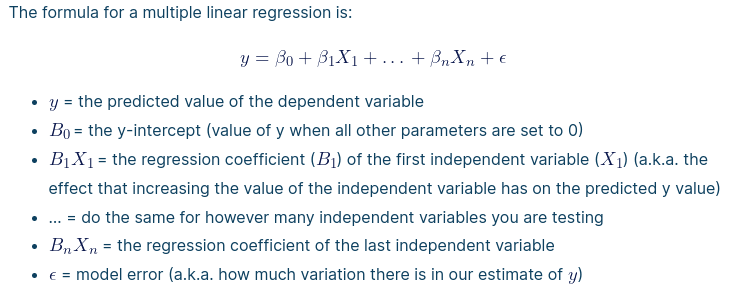

In [26]:
num_multi = numerical.copy() # only the numerical data

In [27]:
test = pd.read_csv("test.csv")
columns_final = test[num_multi.columns].dropna(axis=1).columns  # columns that are not nan in test
num_multi = num_multi[columns_final]

In [28]:
# normalise data set 
num_multi = (num_multi - num_multi.mean()) / num_multi.std()

In [29]:
num_multi

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.878367,-0.793162,1.161454,-0.120201,0.370207,...,-0.950901,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730
1,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.429430,0.257052,-0.794891,-0.120201,-0.482347,...,0.600289,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228
2,0.073350,0.073455,0.651256,-0.517023,0.984415,0.829930,-0.627611,1.188943,-0.120201,0.514836,...,0.600289,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730
3,0.309753,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.521555,0.936955,-0.120201,0.383528,...,0.600289,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186
4,0.073350,0.375020,1.374324,-0.517023,0.951306,0.733056,-0.045596,1.617323,-0.120201,1.298881,...,0.600289,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,-0.260471,-0.071812,-0.517023,0.918196,0.733056,-0.542249,0.794925,-0.120201,0.250316,...,0.600289,-0.751918,-0.100523,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.620678,-0.614228
1456,-0.872264,0.266316,-0.071812,0.381612,0.222899,0.151813,2.354894,-0.794891,-0.120201,1.061003,...,2.151479,2.032535,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,1.644646
1457,0.309753,-0.147760,0.651256,3.077516,-1.002149,1.023678,0.065634,1.844112,-0.120201,1.569110,...,2.151479,-0.751918,0.201336,-0.359202,-0.116299,-0.270116,-0.068668,4.951415,-0.488943,1.644646
1458,-0.872264,-0.080133,-0.794879,0.381612,-0.704164,0.539309,-0.218907,-0.794891,-0.120201,-0.832502,...,-0.950901,2.168167,-0.704242,1.473284,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,1.644646


In [30]:
x_multi = num_multi

In [31]:
y_multi = data_house_price[[target_column]]

In [32]:
model_muti = LinearRegression()

In [33]:
model_muti.fit(x_multi,y_multi)

LinearRegression()

In [34]:
coefs = pd.DataFrame(model_muti.coef_,columns=num_multi.columns).T.rename(columns={0:"coefs"})
coefs.sort_values('coefs')

,coefs
BedroomAbvGr,-9932.635518
MSSubClass,-6708.246868
KitchenAbvGr,-2613.335764
PoolArea,-1462.670107
YrSold,-869.323380
HalfBath,-849.591115
LowQualFinSF,-678.807468
MiscVal,-669.602140
MoSold,-504.577827
FullBath,-454.159706


In [35]:
y_predict_multi = model_muti.predict(x_multi)
y_predict_multi = np.clip(y_predict_multi,0,None)
mse_log_multi = mean_squared_log_error(y_true=y_multi,y_pred=y_predict_multi)
mse_log_multi

0.2749004613250395

Less useful than the first model. We must select the right features.
This is a classic overtraining error

In [36]:
correlations = num_multi.corr()

<AxesSubplot: >

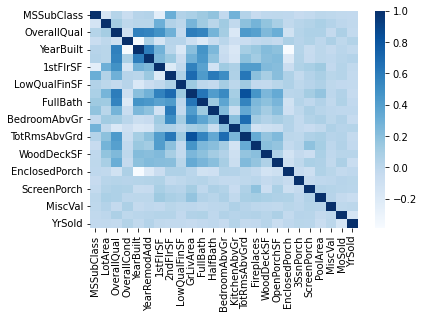

In [37]:
sns.heatmap(correlations, cmap="Blues")

In [38]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

correlations.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000,-0.140,0.033,-0.059,0.028,0.041,-0.252,0.308,0.046,0.075,0.132,0.177,-0.023,0.282,0.040,-0.046,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021
LotArea,-0.140,1.000,0.106,-0.006,0.014,0.014,0.299,0.051,0.005,0.263,0.126,0.014,0.120,-0.018,0.190,0.271,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014
OverallQual,0.033,0.106,1.000,-0.092,0.572,0.551,0.476,0.295,-0.030,0.593,0.551,0.273,0.102,-0.184,0.427,0.397,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027
OverallCond,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.144,0.029,0.025,-0.080,-0.194,-0.061,0.013,-0.087,-0.058,-0.024,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044
YearBuilt,0.028,0.014,0.572,-0.376,1.000,0.593,0.282,0.010,-0.184,0.199,0.468,0.243,-0.071,-0.175,0.096,0.148,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014
YearRemodAdd,0.041,0.014,0.551,0.074,0.593,1.000,0.240,0.140,-0.062,0.287,0.439,0.183,-0.041,-0.150,0.192,0.113,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036
1stFlrSF,-0.252,0.299,0.476,-0.144,0.282,0.240,1.000,-0.203,-0.014,0.566,0.381,-0.120,0.127,0.068,0.410,0.411,0.235,0.212,-0.065,0.056,0.089,0.132,-0.021,0.031,-0.014
2ndFlrSF,0.308,0.051,0.295,0.029,0.010,0.140,-0.203,1.000,0.063,0.688,0.421,0.610,0.503,0.059,0.616,0.195,0.092,0.208,0.062,-0.024,0.041,0.081,0.016,0.035,-0.029
LowQualFinSF,0.046,0.005,-0.030,0.025,-0.184,-0.062,-0.014,0.063,1.000,0.135,-0.001,-0.027,0.106,0.008,0.131,-0.021,-0.025,0.018,0.061,-0.004,0.027,0.062,-0.004,-0.022,-0.029
GrLivArea,0.075,0.263,0.593,-0.080,0.199,0.287,0.566,0.688,0.135,1.000,0.630,0.416,0.521,0.100,0.825,0.462,0.247,0.330,0.009,0.021,0.102,0.170,-0.002,0.050,-0.037


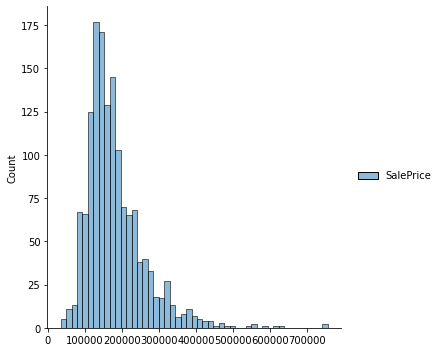

In [52]:
sns.displot(y_multi)

In [39]:
model_no_overfit = LinearRegression()

In [40]:
model_no_overfit.fit(num_multi[num_multi.columns],y)

LinearRegression()

In [41]:
test = pd.read_csv("test.csv")
numerical_test = test.select_dtypes(include=['number'])
numerical_test = numerical.dropna(axis=1)
numerical_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [42]:
pred_best = model_muti.predict(test[])
pred_best = pred_best.reshape(-1)
submit = pd.DataFrame({"Id": test["Id"], "SalePrice": pred_best,})
num_multi = (num_multi - num_multi.mean()) / num_multi.std()
submit.to_csv("result_multi.csv",index=False) # dataset to submit to kaggle 

SyntaxError: invalid syntax (<ipython-input-42-d764f186b850>, line 1)

Logistic regression